In [55]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

| Ticker | Keyword |
|---|---|
| ALV.DE | Allianz |
| BRK-B | Berkshire Hathaway |
| BTC-USD | Bitcoin |
| DOGE-USD | Dogecoin |
| ETH-USD | Ethereum |
| JPM | JP Morgan |
| MSFT | Microsoft |
| NESN.SW | Nestle |
| NVDA | Nvidia |
| TSLA | Tesla |
| WIX | Wix.com |

In [56]:
asset_ticker = 'TSLA'
asset_keyword = 'Tesla'
df = pd.read_csv(f'data/{asset_ticker}.csv', comment='#', index_col=0)
df.index = pd.to_datetime(df.index)
df_transformed = df.diff().dropna()
columns = list(df_transformed.columns)

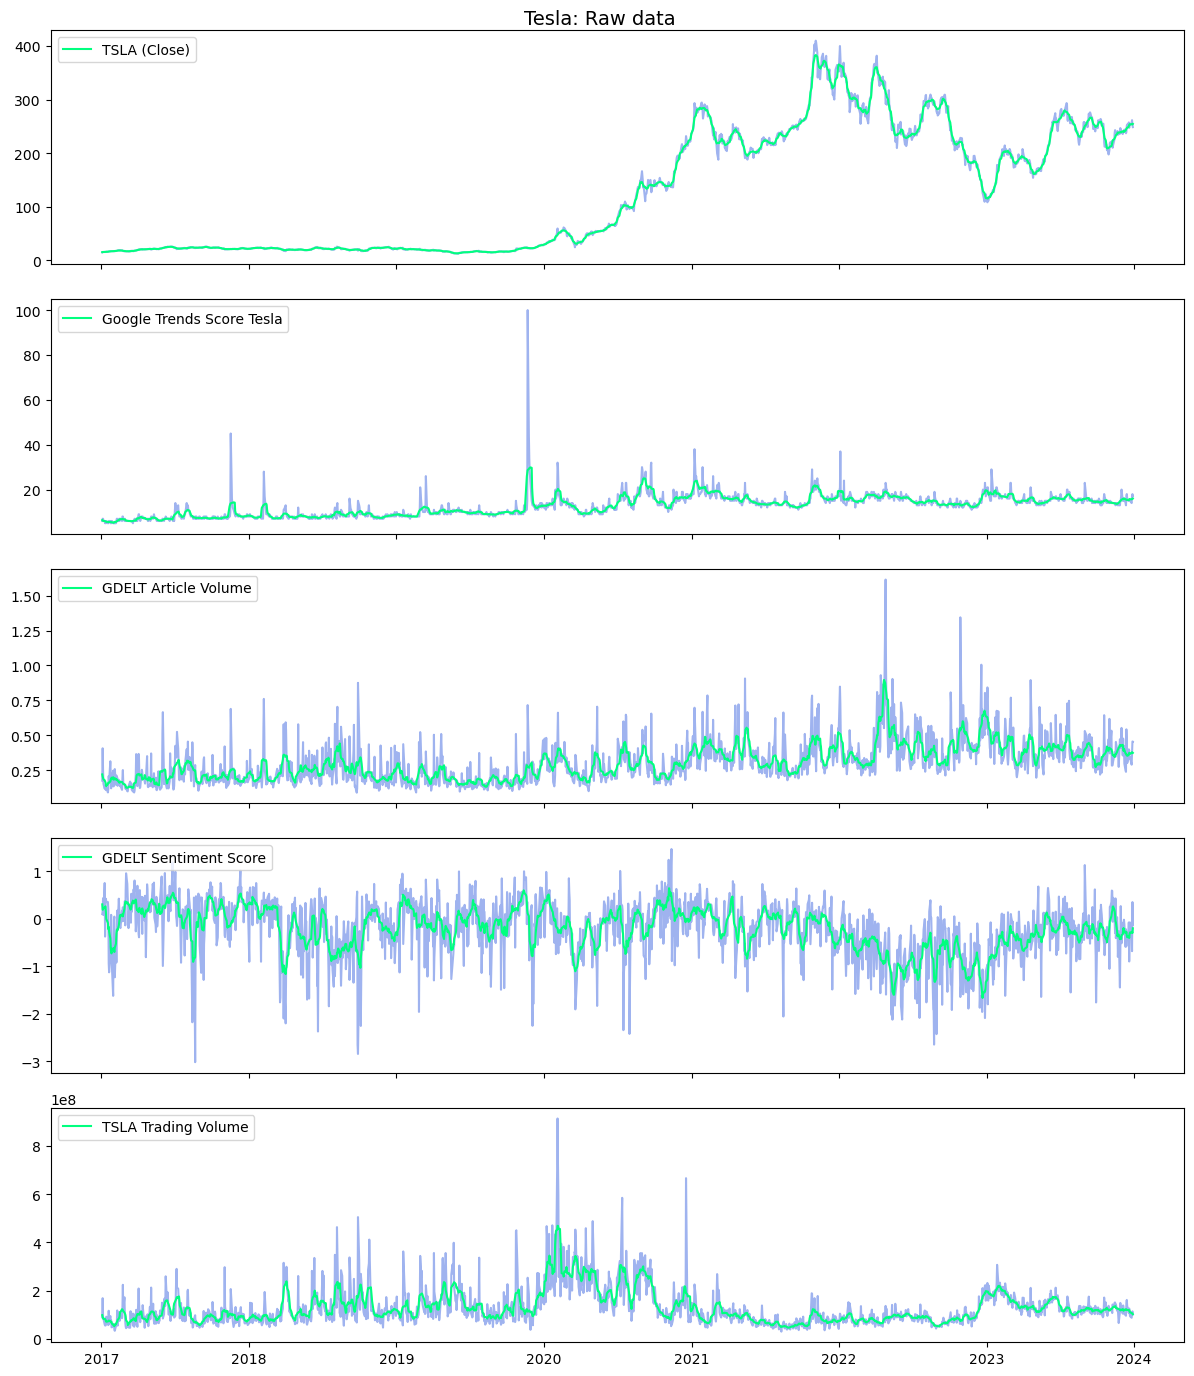

In [65]:
# raw data
window = 10
fig, axs = plt.subplots(5,1, figsize=(12, 14), sharex=True)
for index, column in enumerate(columns[1:]):
    axs[index].plot(df[column].rolling(window, center=True, min_periods=window//2).mean(), color='springgreen', alpha=1, zorder=2)
    axs[index].plot(df[column], color='royalblue', alpha=0.5, zorder=1)
    axs[index].legend([column], loc='upper left')
plt.suptitle(f'{asset_keyword}: Raw data', fontsize=14)
fig.tight_layout()
plt.savefig(f'img/presentation_plots/{asset_ticker}_raw_data.png', dpi=500)

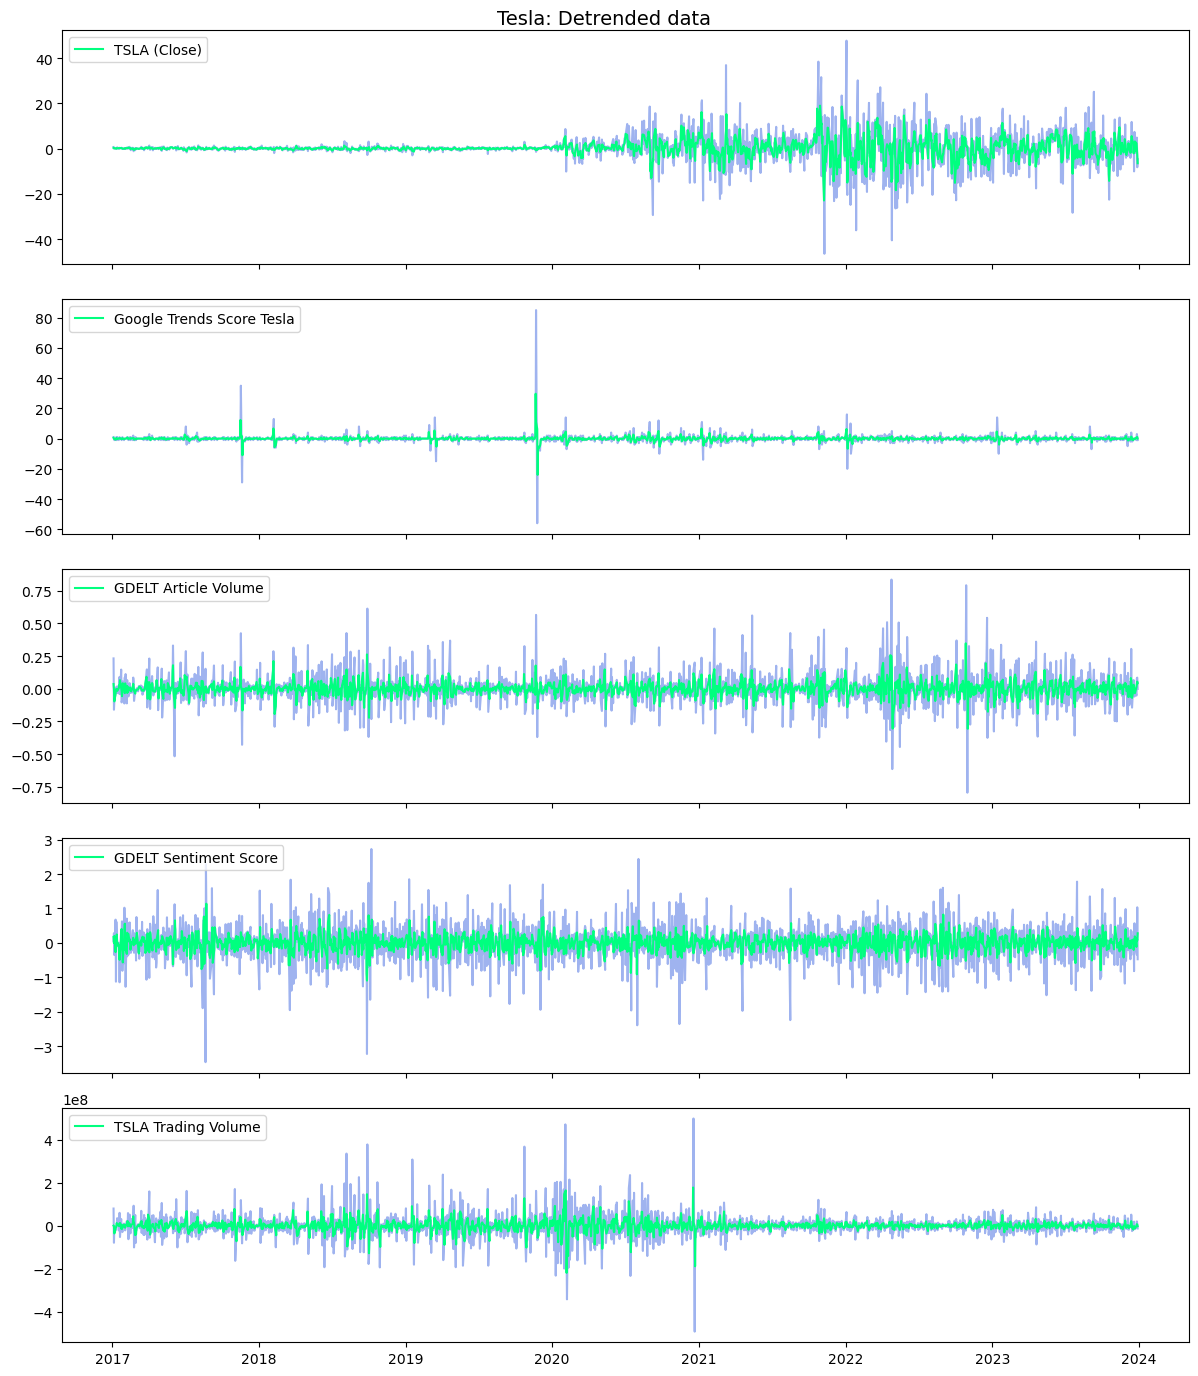

In [66]:
# stationary data
window = 3
fig, axs = plt.subplots(5,1, figsize=(12, 14), sharex=True)
for index, column in enumerate(columns[1:]):
    axs[index].plot(df_transformed[column].rolling(window, center=True, min_periods=window//2).mean(), color='springgreen', alpha=1, zorder=2)
    axs[index].plot(df_transformed[column], color='royalblue', alpha=0.5, zorder=1)
    axs[index].legend([column], loc='upper left')
plt.suptitle(f'{asset_keyword}: Detrended data', fontsize=14)
fig.tight_layout()
plt.savefig(f'img/presentation_plots/{asset_ticker}_stationary_data.png', dpi=500)